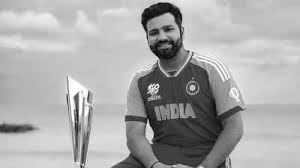

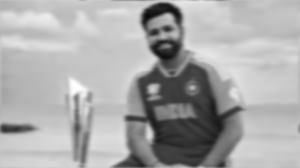

In [2]:
import numpy as np
import cv2
from scipy.fft import fft2, ifft2, fftshift
from google.colab.patches import cv2_imshow

def butterworth_lowpass_filter(shape, cutoff, order):
    P, Q = shape
    H = np.zeros((P, Q))
    for u in range(P):
        for v in range(Q):
            D_uv = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
            H[u, v] = 1 / (1 + (D_uv / cutoff)**(2 * order))
    return H

def apply_filter(image, filter):
    dft = fft2(image)
    dft_shifted = fftshift(dft)
    filtered_dft = dft_shifted * filter
    filtered_dft_shifted = np.fft.ifftshift(filtered_dft)
    filtered_image = np.abs(ifft2(filtered_dft_shifted))
    return filtered_image

# Load the image
image = cv2.imread('/content/ROHIT SHARMA.jpg', 0)  # Load in grayscale

# Define filter parameters
cutoff = 30  # Cutoff frequency
order = 2    # Filter order

# Create the Butterworth filter
filter = butterworth_lowpass_filter(image.shape, cutoff, order)

# Apply the filter to the image
filtered_image = apply_filter(image, filter)

# Display the original and filtered images
cv2_imshow(image)
cv2_imshow(filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()